In [42]:
# #ASSIGNMENT #4:

# Vehicle MPGs Using Linear Regression
# Use the auto-mpg.csv dataset for this assignment
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Importing Linear regression from sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.simplefilter("ignore")



In [43]:
# Load the data from the file auto-mpg.csv.
df = pd.read_csv("auto-mpg.csv")
print(df.head())

   No   mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   1  28.0          4         140.0          90    2264          15.5   
1   2  19.0          3          70.0          97    2330          13.5   
2   3  36.0          4         107.0          75    2205          14.5   
3   4  28.0          4          97.0          92    2288          17.0   
4   5  21.0          6         199.0          90    2648          15.0   

   model_year             car_name  
0          71  chevrolet vega 2300  
1          72      mazda rx2 coupe  
2          82         honda accord  
3          72      datsun 510 (sw)  
4          70          amc gremlin  


In [44]:
# •	Summarize the data set. What is the mean of mpg? (2)
print(df.describe())
# mpg stands for Miles per Gallon

               No         mpg   cylinders  displacement  horsepower  \
count  398.000000  398.000000  398.000000    398.000000  398.000000   
mean   199.500000   23.514573    5.454774    193.425879  104.128141   
std    115.036951    7.815984    1.701004    104.269838   38.313386   
min      1.000000    9.000000    3.000000     68.000000   46.000000   
25%    100.250000   17.500000    4.000000    104.250000   76.000000   
50%    199.500000   23.000000    4.000000    148.500000   92.000000   
75%    298.750000   29.000000    8.000000    262.000000  125.000000   
max    398.000000   46.600000    8.000000    455.000000  230.000000   

            weight  acceleration  model_year  
count   398.000000    398.000000  398.000000  
mean   2970.424623     15.568090   76.010050  
std     846.841774      2.757689    3.697627  
min    1613.000000      8.000000   70.000000  
25%    2223.750000     13.825000   73.000000  
50%    2803.500000     15.500000   76.000000  
75%    3608.000000     17.17500

In [45]:
#•	What is the median value of mpg? (1)
median = df['mpg'].median()
print('Median of MPG is: ',median)

Median of MPG is:  23.0


In [46]:
# •	Which value is higher – mean or median? 
#   What does this indicate in terms of the skewness of the attribute values? Make a plot to verify your answer. (2)

mean = df['mpg'].mean()
print('Mean of MPG is: ',mean)
print('Mean is slightly bigger than median. ')
# Mean is slightly bigger than median. 

Mean of MPG is:  23.5145728643216
Mean is slightly bigger than median. 


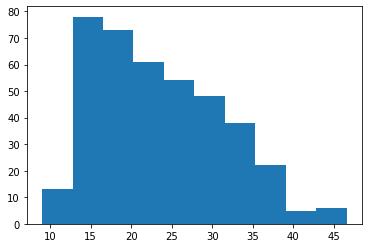

None
Values for mpg are rightly skewed, with heavy concentration in the range of 15-25.


In [47]:
plt.hist(df['mpg'])
print(plt.show())
print('Values for mpg are rightly skewed, with heavy concentration in the range of 15-25.')

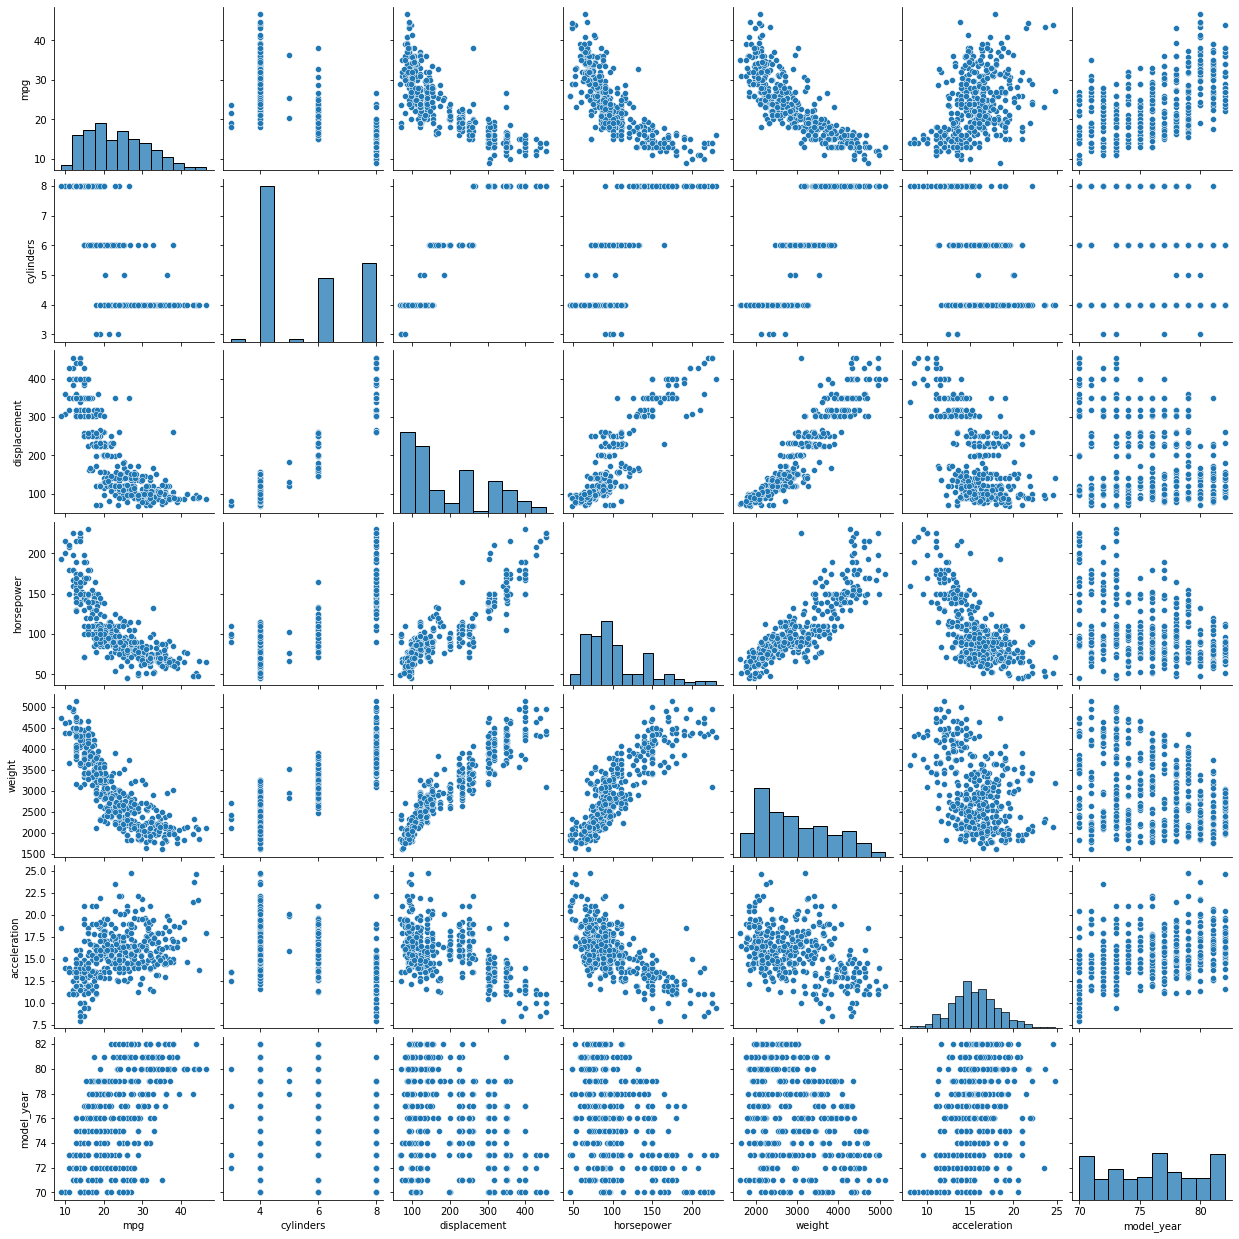

In [48]:
# Plot the pairplot matrix of all the relevant numeric attributes. (don’t consider No and car_name)? (2)
descriptive_features = df.iloc[:,1:-1]
#print(descriptive_features)
print(sns.pairplot(descriptive_features))

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='model_year', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='horsepower', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='model_year', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel

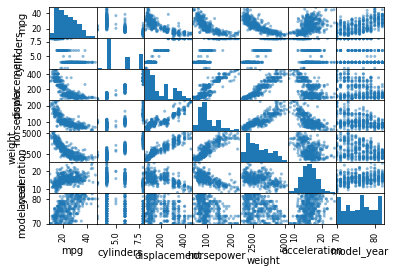

In [50]:
pd.plotting.scatter_matrix(descriptive_features)

AxesSubplot(0.125,0.125;0.62x0.755)
Features that are strongly correlated are Displacement and Cylinders


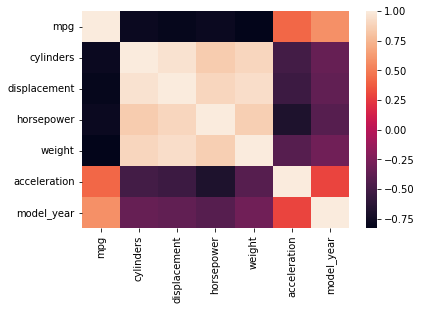

In [ ]:
#•	Based on the pairplot matrix, which two attributes seem to be most strongly linearly correlated? (2)
corr = descriptive_features.corr()
print(sns.heatmap(corr))
print('Features that are strongly correlated are Displacement and Cylinders.')

In [ ]:
# •	Based on the pairplot matrix, which two attributes seem to be most weakly correlated. (2)
print('Features that are Weakly correlated are mpg and weight.')

Features that are Weakly correlated are mpg and weight.


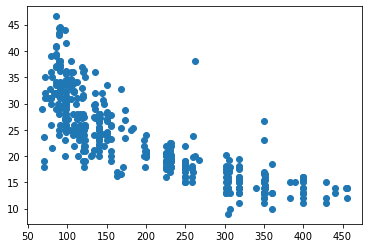

In [51]:
# •	Produce a scatterplot of the two attributes mpg and displacement with displacement on the x axis and mpg on the y axis. (2)

print(plt.scatter(df['displacement'],df['mpg']))

In [ ]:
#•	Build a linear regression model with mpg as the target and displacement as the predictor. 
# Answer the following questions based on the regression model.
predictor = descriptive_features[['displacement']]
target = descriptive_features[['mpg']]
predictor.head(), target.head()

(   displacement
 0         140.0
 1          70.0
 2         107.0
 3          97.0
 4         199.0,
     mpg
 0  28.0
 1  19.0
 2  36.0
 3  28.0
 4  21.0)

In [ ]:
# Fitting Multiple Linear Regression to the data set
regressor = LinearRegression()
regressor.fit(predictor, target)
regressor

LinearRegression()

In [ ]:
#•	For your model, what is the value of the intercept β0 ? (1)

print('The value of the intercept β0 is: ',regressor.intercept_[0])

#• For your model, what is the value of the coefficient β1 of the attribute displacement? (1)
print('The value of the coefficient β1 is: ',regressor.coef_[0][0])


#•	What is the regression equation as per the model? (2)
print('The regression equation as per the model is : y = 35.175 + (-0.06 * x)')

# •	For your model, does the predicted value for mpg increase or decrease as the displacement increases? (2)
print('As the Coefficient is negative for my model, the predicted value for mpg Decreases as the displacement increases.')

# •	Given a car with a displacement value of 220, what would your model predict its mpg to be? (2)
pred = regressor.predict([[220]])
print('Given a car with a displacement value of 220, mpg would be: ', pred[0][0])

The value of the intercept β0 is:  35.17475015429319
The value of the coefficient β1 is:  -0.06028240546881722
The regression equation as per the model is : y = 35.175 + (-0.06 * x)
As the Coefficient is negative for my model, the predicted value for mpg Decreases as the displacement increases.
Given a car with a displacement value of 220, mpg would be:  21.912620951153407


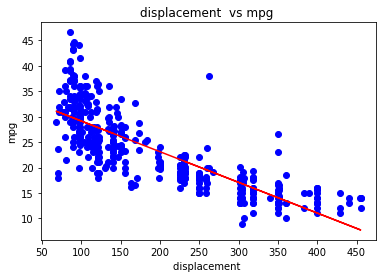

None


In [ ]:
# Display a scatterplot of the actual mpg vs displacement and superimpose the linear regression line. (2)

viz_train = plt
viz_train.scatter(predictor, target, color='blue')
viz_train.plot(predictor, regressor.predict(predictor), color='red')
viz_train.title('displacement  vs mpg ')
viz_train.xlabel('displacement ')
viz_train.ylabel('mpg')
print(viz_train.show())


   No   mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   1  28.0          4         140.0          90    2264          15.5   
1   2  19.0          3          70.0          97    2330          13.5   
2   3  36.0          4         107.0          75    2205          14.5   
3   4  28.0          4          97.0          92    2288          17.0   
4   5  21.0          6         199.0          90    2648          15.0   

   model_year             car_name  
0          71  chevrolet vega 2300  
1          72      mazda rx2 coupe  
2          82         honda accord  
3          72      datsun 510 (sw)  
4          70          amc gremlin  
               No         mpg   cylinders  displacement  horsepower  \
count  398.000000  398.000000  398.000000    398.000000  398.000000   
mean   199.500000   23.514573    5.454774    193.425879  104.128141   
std    115.036951    7.815984    1.701004    104.269838   38.313386   
min      1.000000    9.000000    3.000000     68.

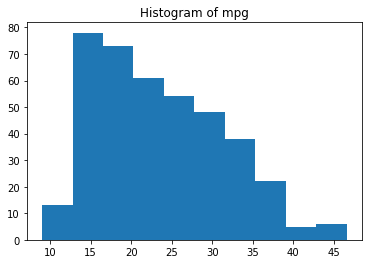

None
Values for mpg are rightly skewed, with heavy concentration in the range of 15-25.
The value of the intercept β0 is:  35.17475015429319
The value of the coefficient β1 is:  -0.06028240546881722
The regression equation as per the model is : y = 35.175 + (-0.06 * x)
As the Coefficient is negative for my model, the predicted value for mpg Decreases as the displacement increases.
Given a car with a displacement value of 220, mpg would be:  21.912620951153407


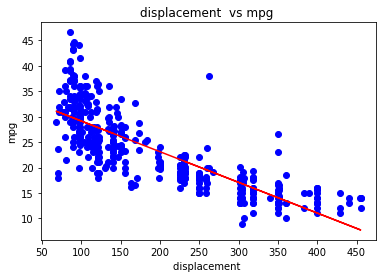

None
<module 'matplotlib.pyplot' from '/Users/asadtariq/opt/anaconda3/envs/pythonProject/lib/python3.7/site-packages/matplotlib/pyplot.py'>
[[<AxesSubplot:xlabel='mpg', ylabel='mpg'>
  <AxesSubplot:xlabel='cylinders', ylabel='mpg'>
  <AxesSubplot:xlabel='displacement', ylabel='mpg'>
  <AxesSubplot:xlabel='horsepower', ylabel='mpg'>
  <AxesSubplot:xlabel='weight', ylabel='mpg'>
  <AxesSubplot:xlabel='acceleration', ylabel='mpg'>
  <AxesSubplot:xlabel='model_year', ylabel='mpg'>]
 [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>
  <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>
  <AxesSubplot:xlabel='displacement', ylabel='cylinders'>
  <AxesSubplot:xlabel='horsepower', ylabel='cylinders'>
  <AxesSubplot:xlabel='weight', ylabel='cylinders'>
  <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>
  <AxesSubplot:xlabel='model_year', ylabel='cylinders'>]
 [<AxesSubplot:xlabel='mpg', ylabel='displacement'>
  <AxesSubplot:xlabel='cylinders', ylabel='displacement'>
  <AxesSubplot:xlabel=

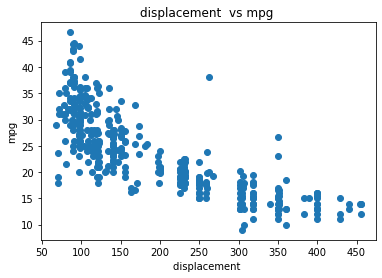

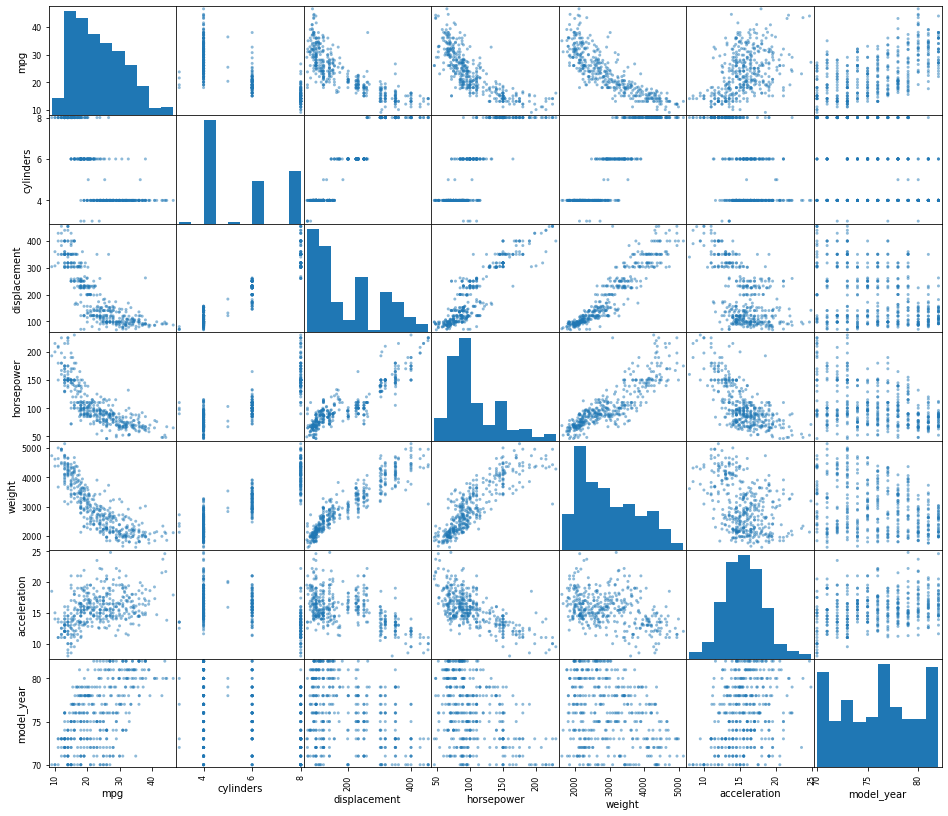

In [58]:
# #ASSIGNMENT #4:

# Vehicle MPGs Using Linear Regression
# Use the auto-mpg.csv dataset for this assignment
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Importing Linear regression from sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.simplefilter("ignore")

def main():
    # Load the data from the file auto-mpg.csv.
    df = pd.read_csv("auto-mpg.csv")
    print(df.head())

    # •	Summarize the data set. What is the mean of mpg? (2)
    print(df.describe())
    # mpg stands for Miles per Gallon

    #•	What is the median value of mpg? (1)
    median = df['mpg'].median()
    print('Median of MPG is: ',median)

    # •	Which value is higher – mean or median? 
    #   What does this indicate in terms of the skewness of the attribute values? Make a plot to verify your answer. (2)

    mean = df['mpg'].mean()
    print('Mean of MPG is: ',mean)
    print('Mean is slightly bigger than median. ')
    # Mean is slightly bigger than median. 


    plt.hist(df['mpg'])
    plt.title('Histogram of mpg')
    print(plt.show())
    print('Values for mpg are rightly skewed, with heavy concentration in the range of 15-25.')

    # Plot the pairplot matrix of all the relevant numeric attributes. (don’t consider No and car_name)? (2)
    descriptive_features = df.iloc[:,1:-1]
    
    #•	Build a linear regression model with mpg as the target and displacement as the predictor. 
    # Answer the following questions based on the regression model.
    predictor = descriptive_features[['displacement']]
    target = descriptive_features[['mpg']]
    predictor.head(), target.head()

    # Fitting Multiple Linear Regression to the data set
    regressor = LinearRegression()
    regressor.fit(predictor, target)
    regressor

    #•	For your model, what is the value of the intercept β0 ? (1)

    print('The value of the intercept β0 is: ',regressor.intercept_[0])

    #• For your model, what is the value of the coefficient β1 of the attribute displacement? (1)
    print('The value of the coefficient β1 is: ',regressor.coef_[0][0])


    #•	What is the regression equation as per the model? (2)
    print('The regression equation as per the model is : y = 35.175 + (-0.06 * x)')

    # •	For your model, does the predicted value for mpg increase or decrease as the displacement increases? (2)
    print('As the Coefficient is negative for my model, the predicted value for mpg Decreases as the displacement increases.')

    # •	Given a car with a displacement value of 220, what would your model predict its mpg to be? (2)
    pred = regressor.predict([[220]])
    print('Given a car with a displacement value of 220, mpg would be: ', pred[0][0])
    
   

    # Display a scatterplot of the actual mpg vs displacement and superimpose the linear regression line. (2)

    viz_train = plt
    viz_train.scatter(predictor, target, color='blue')
    viz_train.plot(predictor, regressor.predict(predictor), color='red')
    viz_train.title('displacement  vs mpg ')
    viz_train.xlabel('displacement ')
    viz_train.ylabel('mpg')
    print(viz_train.show())


    # •	Produce a scatterplot of the two attributes mpg and displacement with displacement on the x axis and mpg on the y axis. (2)
    viz = plt
    plt.scatter(df['displacement'],df['mpg'])
    viz.title('displacement  vs mpg ')
    viz.xlabel('displacement ')
    viz.ylabel('mpg')
    print(viz)
    

    # Plot the pairplot matrix of all the relevant numeric attributes. (don’t consider No and car_name)? (2)
    #print(descriptive_features)
    
    print(pd.plotting.scatter_matrix(descriptive_features,figsize=(16, 14)))
    

    #•	Based on the pairplot matrix, which two attributes seem to be most strongly linearly correlated? (2)
    corr = descriptive_features.corr()
    #print(sns.heatmap(corr))
    print('Features that are strongly correlated are Displacement and Cylinders.')

    # •	Based on the pairplot matrix, which two attributes seem to be most weakly correlated. (2)
    print('Features that are Weakly correlated are mpg and weight.')


if __name__ == '__main__':
    main()


In [62]:
print(' multiplication table ：')
for x in range(1,10):
    for y in range(1,x+1):
        #for y in range(1,10):
        print(x,'*',y,"=",x*y,end='\t')
    print()



 multiplication table ：
1 * 1 = 1	
2 * 1 = 2	2 * 2 = 4	
3 * 1 = 3	3 * 2 = 6	3 * 3 = 9	
4 * 1 = 4	4 * 2 = 8	4 * 3 = 12	4 * 4 = 16	
5 * 1 = 5	5 * 2 = 10	5 * 3 = 15	5 * 4 = 20	5 * 5 = 25	
6 * 1 = 6	6 * 2 = 12	6 * 3 = 18	6 * 4 = 24	6 * 5 = 30	6 * 6 = 36	
7 * 1 = 7	7 * 2 = 14	7 * 3 = 21	7 * 4 = 28	7 * 5 = 35	7 * 6 = 42	7 * 7 = 49	
8 * 1 = 8	8 * 2 = 16	8 * 3 = 24	8 * 4 = 32	8 * 5 = 40	8 * 6 = 48	8 * 7 = 56	8 * 8 = 64	
9 * 1 = 9	9 * 2 = 18	9 * 3 = 27	9 * 4 = 36	9 * 5 = 45	9 * 6 = 54	9 * 7 = 63	9 * 8 = 72	9 * 9 = 81	


In [63]:
pip install xlwt

     |████████████████████████████████| 99 kB 4.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [65]:
import xlwt

In [66]:
workbook = xlwt.Workbook()
sheet = workbook.add_sheet("table")

In [77]:
import numpy as np

In [82]:
a = np.array([1,2,3])
np.r_[np.repeat(a, 3), np.tile(a, 3)]

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [76]:

multiplicationBook = xlwt.Workbook(encoding="utf-8")
multipsheet = multiplicationBook.add_sheet("sheet1")
for i in range(1, 10):
    for j in range(1, i+1):
        multipsheet.write(i-1, j-1, str(i)+"*"+str(j)+"="+str(i*j))
multiplicationBook.save('table.xls')
print()

Mean of MPG is:  23.5145728643216
Median of MPG is:  23.0
Mean is slightly bigger than median

Values for mpg are skewed to the right
This is in accordance with a mean larger than median

The value of the intercept β0 is:  35.17475015429319

The value of the coefficient β1 is:  -0.06028240546881722

The regression equation as per the model is : y = 35.175 + (-0.06x)

The coefficient is negative
Which means the predicted value for MPG decreases as displacement increases

Given a car with a displacement value of 220, mpg would be:  21.912620951153407
Features that are most strongly correlated: Horsepower and MPG

Features that are most weakly correlated: Weight and Model year


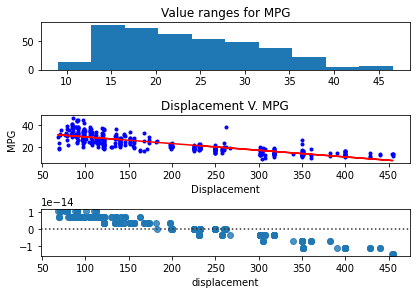

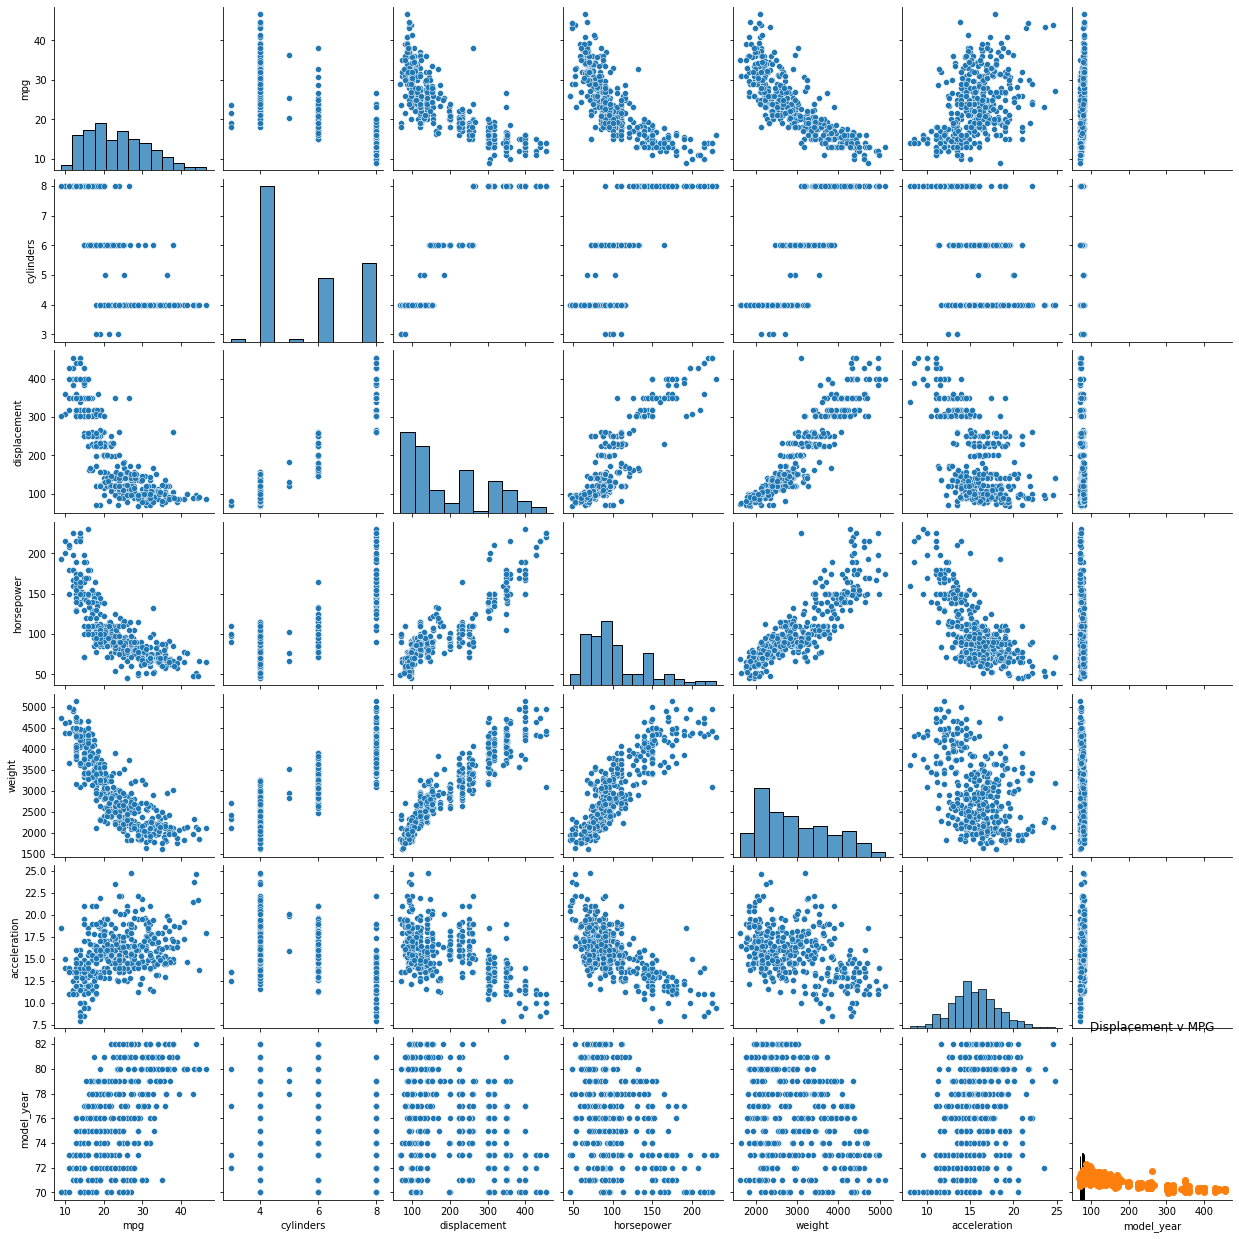

In [88]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter("ignore")


def main():

    # Load the data from the file auto-mpg.csv.
    file_path = 'auto-mpg.csv'
    df = pd.read_csv(file_path)
    #print(df.head())

    # summarize the data set
    summarize = df.describe()
    #print(summarize)
    
    # what is the mean of mpg?
    mean = df['mpg'].mean()
    print('Mean of MPG is: ', mean)
    # what is the median value of mpg?
    median = df['mpg'].median()
    print('Median of MPG is: ', median)

    # which value is higher, mean or median? 
    print('Mean is slightly bigger than median')
    
    fig, ax = plt.subplots(3)
    
    
    # plot a histogram
    # to find skewness of attribute values
    ax[0].hist(df['mpg'])
    ax[0].set(title='Value ranges for MPG')
    print('\nValues for mpg are skewed to the right')
    print('This is in accordance with a mean larger than median')
    
#   ****NOTE****
#   I was having trouble with overlapping graphs
#   So I fixed the issue by putting questions 4-7 at the end of code
#   I understand this is bad practice--but the outputs are still in line!
#   I hope this is a nonissue!

    
    
    # STARTING WITH #8
    # No is the first in dataset, car_name is the last
    # can use iloc to remove
    df_desc = df.iloc[:,1:-1]
    #df.drop(labels='car_name', axis=1, inplace=True)
    #df.drop(labels='No', axis=1, inplace=True)

    # build a linear regression model with mpg as the target and displacement as the predictor 
    predictor = df_desc[['displacement']]
    target = df_desc[['mpg']]
    predictor.head(), target.head()

    # fit multiple linear regression lines to the data set
    regressor = LinearRegression()
    regressor.fit(predictor, target)

    # what is the value of the intercept β0?
    print('\nThe value of the intercept β0 is: ',regressor.intercept_[0])

    # what is the value of the coefficient β1 of the attribute displacement? (1)
    print('\nThe value of the coefficient β1 is: ',regressor.coef_[0][0])


    # what is the regression equation as per the model?
    print('\nThe regression equation as per the model is : y = 35.175 + (-0.06x)')

    # does the predicted value for mpg increase or decrease as the displacement increases?
    print('\nThe coefficient is negative')
    print('Which means the predicted value for MPG decreases as displacement increases')

    # given a car with a displacement value of 220, what would your model predict its mpg to be?
    pred = regressor.predict([[220]])
    print('\nGiven a car with a displacement value of 220, mpg would be: ', pred[0][0])

    # display a scatterplot of the actual mpg v displacement
    ax[1].scatter(predictor, target, color='blue', marker='.')
    # superimpose the linear regression line
    ax[1].plot(predictor, regressor.predict(predictor), color='red')
    ax[1].set(title='Displacement V. MPG', xlabel='Displacement', ylabel='MPG')
    plt.tight_layout()
    plt.savefig('Plot_1_8.png')

    #ax[2].plot(predictor, regressor.predict(predictor), color='red')
    sns.residplot(predictor, regressor.predict(predictor))
    
    # BACK TO QUESTIONS 4-7
    
    # plot the pairplot matrix of all the relevant numeric attributes
    # using df_desc from above
    sns.pairplot(df_desc)
    plt.savefig('Pair_Plot.png')
    
    # correlation matrix information
    #corr = df_desc.corr()
    #sns.heatmap(corr)
    #plt.show()
    
    # which two attributes seem to be most strongly linearly correlated?
    # NOTE: I am saying anything strongly correlated is closest to 1 OR -1
    print('Features that are most strongly correlated: Horsepower and MPG')
    # NOTE: runner ups include weight and horsepower, and displacement and cylinders
    
    # NOTE: I am saying anything weakly correlated is closest to 0, either positive or negative
    # which two attributes seem to be most weakly correlated
    print('\nFeatures that are most weakly correlated: Weight and Model year')
    # other runner ups include weight/acceleration, and mpg/acceleration
    
    
    # produce a scatterplot of the two attributes mpg and displacement with displacement on the x axis and mpg on the y axis. (2)
    plt.scatter(df_desc['displacement'], df_desc['mpg'])
    plt.title('Displacement v MPG')
    plt.xlabel('Displacement')
    plt.ylabel('Miles per Gallon')
    # NOTE: for smooth code, commented this out
    # so no overlapping graphs
    #plt.savefig('MPG_Displacement.png')


if __name__ == '__main__':
    main()
